# Machine Learning: A Quantitative Approach

In [1]:
%matplotlib inline

In [212]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from time import time
import matplotlib.style as style
from collections import Counter
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot') # set the theme for matplotlib

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Load Dataset

In [9]:
vehicles_df = pd.read_csv("datasets/vehicles.csv", low_memory = False)

In [17]:
vehicles_displ = vehicles_df['displ']

In [18]:
attributes = ['displ', 'year', 'UHighway', 'UCity', 'fuelType']
vehicles_data_all = vehicles_df[attributes]

## Exploratory Data Analysis

In [29]:
vehicles_data_all.head()

,displ,year,UHighway,UCity,fuelType
0,2.0,1985,35.0000,23.3333,Regular
1,4.9,1985,19.0000,11.0000,Regular
2,2.2,1985,47.0000,29.0000,Regular
3,5.2,1985,16.6667,12.2222,Regular
4,2.2,1993,32.0000,21.0000,Premium


In [20]:
vehicles_2010 = vehicles_df[vehicles_df.year == 2010]

In [21]:
print("type of vehicles_displ: " + str(type(vehicles_displ)))

type of vehicles_displ: <class 'pandas.core.series.Series'>


In [22]:
print("type of vehicles_data_all: " + str(type(vehicles_data_all)))

type of vehicles_data_all: <class 'pandas.core.frame.DataFrame'>


In [23]:
print("type of vehicles_2010: " + str(type(vehicles_2010)))

type of vehicles_2010: <class 'pandas.core.frame.DataFrame'>


In [24]:
vehicles_displ.head()

0    2.0
1    4.9
2    2.2
3    5.2
4    2.2
Name: displ, dtype: float64

In [25]:
vehicles_displ.tail()

41139    2.2
41140    2.2
41141    2.2
41142    2.2
41143    2.2
Name: displ, dtype: float64

In [30]:
vehicles_displ.value_counts()

2.0    4314
3.0    3388
2.5    2535
2.4    2027
3.5    1725
1.8    1651
1.6    1612
5.0    1548
4.3    1383
2.2    1383
2.3    1150
5.7    1115
4.0    1115
3.6    1081
3.8    1011
2.8    1002
5.3     879
1.5     842
6.2     699
3.7     598
4.6     576
5.2     570
3.2     539
4.2     536
2.7     536
3.3     477
6.0     443
3.4     435
1.9     418
4.7     383
       ... 
1.4     285
4.8     267
3.1     255
2.9     221
5.5     219
5.6     199
1.3     192
1.0     172
5.8     160
6.8     142
6.5     123
2.1     106
4.1      95
4.5      90
1.7      76
6.7      74
6.4      50
1.2      49
6.3      45
6.6      32
8.0      25
6.1      24
1.1      12
8.4      11
7.0      10
8.3       9
0.6       8
0.9       6
7.4       4
0.0       1
Name: displ, Length: 66, dtype: int64

In [31]:
vehicles_displ.describe()

count    40940.000000
mean         3.294238
std          1.357151
min          0.000000
25%          2.200000
50%          3.000000
75%          4.300000
max          8.400000
Name: displ, dtype: float64

In [36]:
print("info of vehicles_2010:\n")
print(vehicles_2010.info)

info of vehicles_2010:

<bound method DataFrame.info of        barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
17961  17.347895         0.0        0.0        0.0      16   0.0000        0   
17962  19.388824         0.0        0.0        0.0      15   0.0000        0   
17963  18.311667         0.0        0.0        0.0      16   0.0000        0   
17965  14.982273         0.0        0.0        0.0      19   0.0000        0   
17966  14.330870         0.0        0.0        0.0      19   0.0000        0   
17967  15.695714         0.0        0.0        0.0      19   0.0000        0   
17968  14.982273         0.0        0.0        0.0      19   0.0000        0   
17969  14.982273         0.0        0.0        0.0      19   0.0000        0   
17970  14.330870         0.0        0.0        0.0      19   0.0000        0   
17971  15.695714         0.0        0.0        0.0      19   0.0000        0   
17972  14.982273         0.0        0.0        0.0      19   0.0

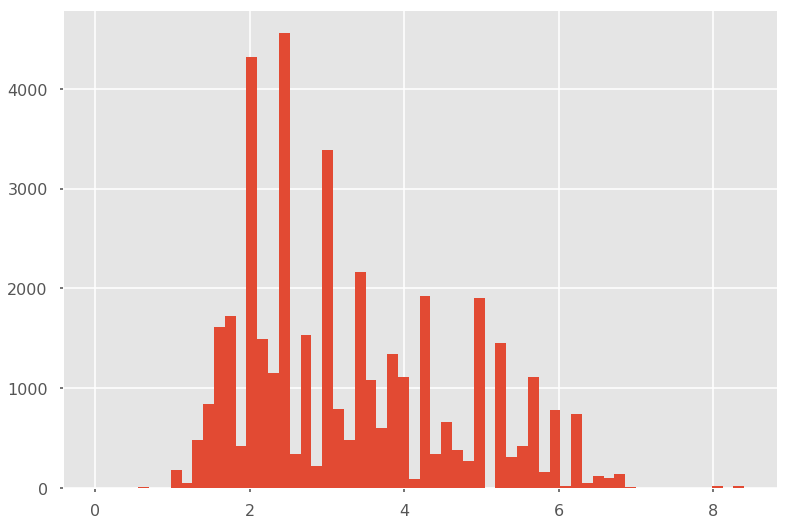

In [52]:
vehicles_displ.hist(bins = 60)
plt.show()

In [49]:
attributes = ['displ', 'year', 'UHighway', 'UCity', 'fuelType']
vehicles_data = vehicles_df[attributes]

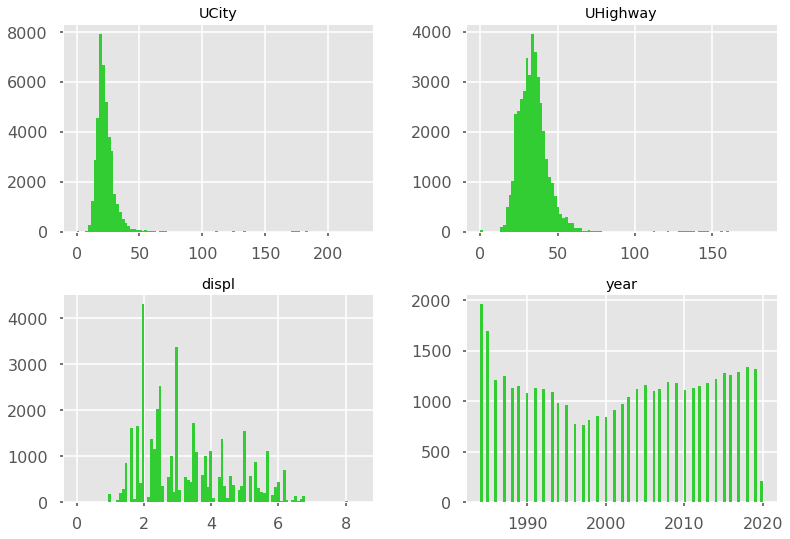

In [50]:
vehicles_data.hist(bins=100, color = 'limegreen')
plt.show()

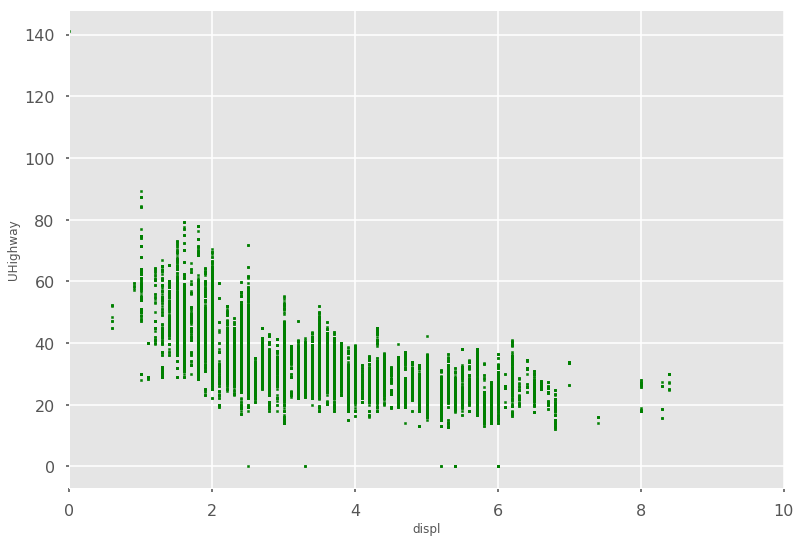

In [51]:
vehicles_data.plot(kind="scatter", xlim=[0, 10], x = 'displ', y = 'UHighway', \
                      s = 2.5, c = "g", marker="s")
plt.show()

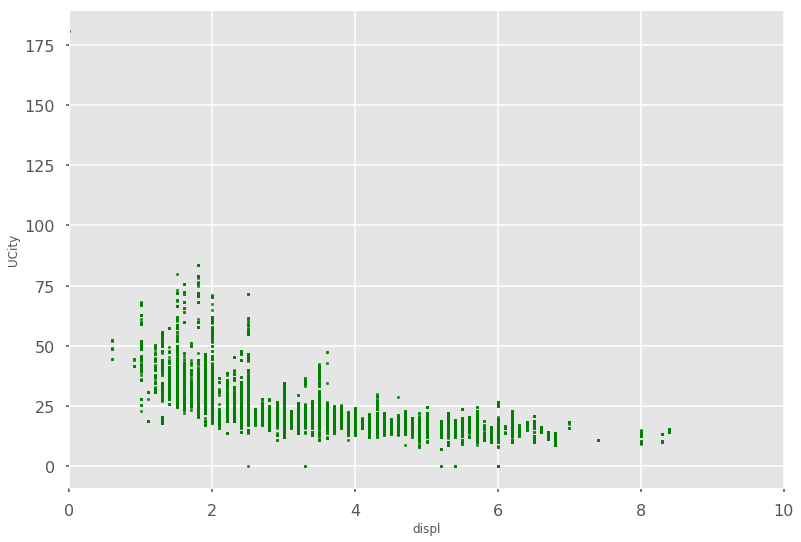

In [48]:
vehicles_data.plot(kind="scatter", xlim=[0, 10], x = 'displ', y = 'UCity', \
                      s = 2.5, c = "g", marker="s")
plt.show()

type of vehicles_data_all: <class 'pandas.core.frame.DataFrame'>
              displ          year      UHighway         UCity
count  39167.000000  39169.000000  39169.000000  39169.000000
mean       3.251745   2001.013276     33.965460     22.678804
std        1.340134     11.111816      8.804511      6.775097
min        0.900000   1984.000000      0.000000      0.000000
25%        2.200000   1991.000000     28.000000     18.442100
50%        3.000000   2001.000000     33.333300     21.500000
75%        4.200000   2011.000000     39.000000     25.997300
max        8.400000   2020.000000     89.202900     83.559800


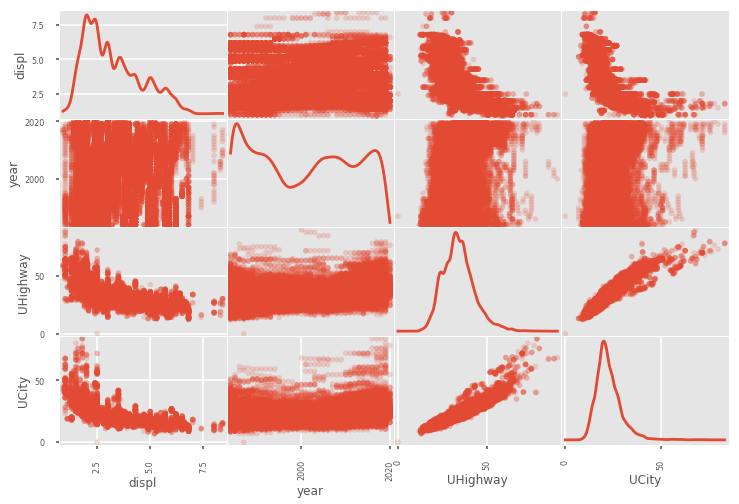

In [191]:
# pandas DataFrame objects
attributes = ['displ', 'year', 'UHighway', 'UCity', 'fuelType']    
vehicles_data_all = vehicles_df [attributes]
print ("type of vehicles_data_all: " + str(type(vehicles_data_all)))
    
vehicles_data = vehicles_data_all [(vehicles_data_all.fuelType == 'Regular') | \
        (vehicles_data_all.fuelType == 'Premium') | (vehicles_data_all.fuelType == 'Diesel')]

print (vehicles_data.describe())

colors_palette = {'Regular': "red", 'Premium': "green", 'Diesel': 'yellow'}

groups = list(vehicles_data.fuelType)
colors = [colors_palette[c] for c in groups] 
scatter_matrix ( vehicles_data [attributes], figsize = (12, 8), alpha=0.2, diagonal='kde')
plt.show()

In [96]:
vehicles_data.fuelType.unique()

array(['Regular', 'Premium', 'Diesel', 'CNG', 'Gasoline or natural gas',
       'Gasoline or E85', 'Electricity', 'Gasoline or propane',
       'Premium or E85', 'Midgrade', 'Premium Gas or Electricity',
       'Regular Gas and Electricity', 'Premium and Electricity',
       'Regular Gas or Electricity'], dtype=object)

In [117]:
vehicles_displ_mpg_2 = vehicles_df[attributes].copy()

In [118]:
vehicles_displ_mpg_processed = vehicles_displ_mpg_2[vehicles_displ_mpg_2.displ > 0]

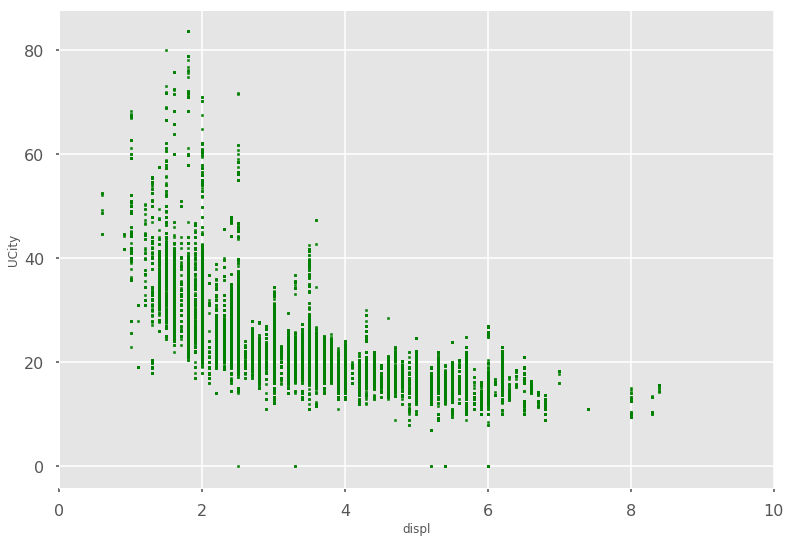

In [119]:
vehicles_displ_mpg_processed.plot(kind="scatter", xlim=[0, 10], x = 'displ', y = 'UCity', \
                      s = 2.5, c = "g", marker="s")
plt.show()

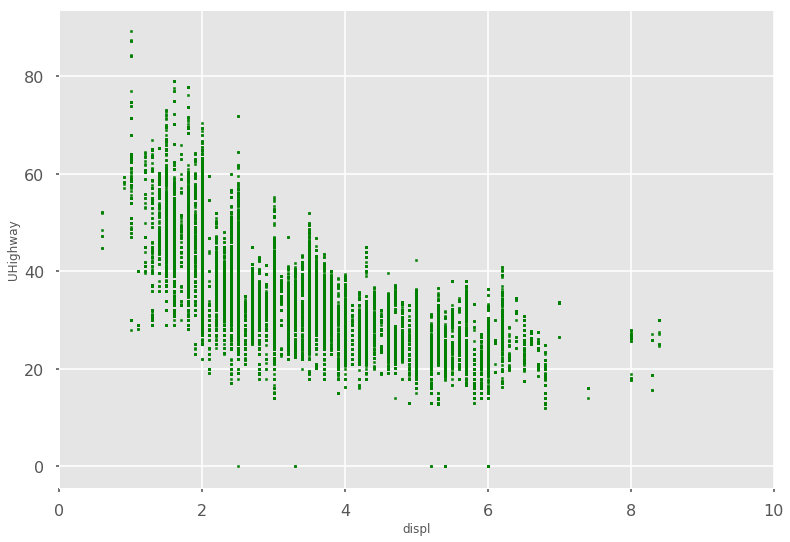

In [120]:
vehicles_displ_mpg_processed.plot(kind="scatter", xlim=[0, 10], x = 'displ', y = 'UHighway', \
                      s = 2.5, c = "g", marker="s")
plt.show()

In [122]:
vehicles_displ_mpg_sorted = vehicles_displ_mpg_processed.sort_values(by=['displ', 'UHighway'])

In [124]:
print (vehicles_displ_mpg_sorted.head(5))
print (vehicles_displ_mpg_sorted.tail(5))
print (vehicles_displ_mpg_sorted.describe())

       displ  year  UHighway    UCity                    fuelType
34338    0.6  2019   44.8000  44.7000  Premium Gas or Electricity
34339    0.6  2019   44.8000  44.7000  Premium Gas or Electricity
32813    0.6  2018   47.1695  48.6702  Premium Gas or Electricity
32814    0.6  2018   47.1695  48.6702  Premium Gas or Electricity
31032    0.6  2017   48.4000  49.2000  Premium Gas or Electricity
       displ  year  UHighway  UCity fuelType
16217    8.4  2008      30.0   15.6  Premium
17925    8.4  2009      30.0   15.6  Premium
17926    8.4  2009      30.0   15.6  Premium
21874    8.4  2010      30.0   15.6  Premium
21875    8.4  2010      30.0   15.6  Premium
              displ          year      UHighway         UCity
count  40939.000000  40939.000000  40939.000000  40939.000000
mean       3.294318   2001.472215     33.870518     22.606398
std        1.357070     11.125863      8.855918      6.887190
min        0.600000   1984.000000      0.000000      0.000000
25%        2.200000   19

In [126]:
vehicles_displ_mpg_grouped = vehicles_displ_mpg_sorted.groupby('displ')['UHighway'].median()
print(type(vehicles_displ_mpg_grouped))

<class 'pandas.core.series.Series'>


In [128]:
print(vehicles_displ_mpg_grouped.head(5))
print(vehicles_displ_mpg_grouped.tail(5))
print(vehicles_displ_mpg_grouped.describe())

displ
0.6    47.78475
0.9    58.40000
1.0    58.52260
1.1    29.00000
1.2    47.00000
Name: UHighway, dtype: float64
displ
7.0    33.55
7.4    16.00
8.0    26.40
8.3    18.70
8.4    30.00
Name: UHighway, dtype: float64
count    65.000000
mean     31.416092
std       9.438770
min      16.000000
25%      24.800000
50%      29.070000
75%      35.000000
max      58.522600
Name: UHighway, dtype: float64


In [130]:
df_mean = pd.DataFrame({'mean' : vehicles_displ_mpg_sorted.groupby('displ')['UHighway'].mean()}).reset_index() 
df_mean.to_csv("datasets/vehicles_processed_mean.csv")

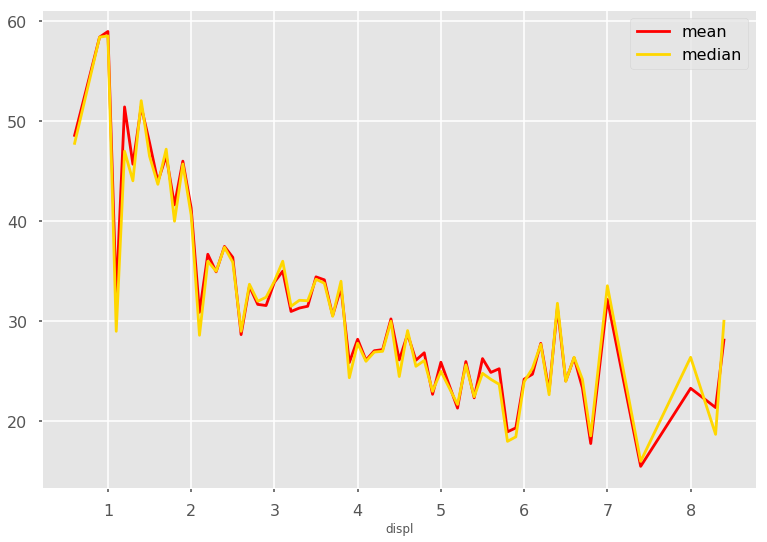

In [138]:
ax = df_mean.plot (x = "displ", y = "mean", c = "r")
df_median = pd.DataFrame({'median' : vehicles_displ_mpg_sorted.groupby('displ')['UHighway'].median()}).reset_index() 
df_median.plot (ax=ax, x = "displ", y = "median", c = "gold")

plt.show()

In [133]:
print(df_median.head(5))
print(df_median.tail(5))
print(df_median.describe())

   displ    median
0    0.6  47.78475
1    0.9  58.40000
2    1.0  58.52260
3    1.1  29.00000
4    1.2  47.00000
    displ  median
60    7.0   33.55
61    7.4   16.00
62    8.0   26.40
63    8.3   18.70
64    8.4   30.00
           displ     median
count  65.000000  65.000000
mean    4.086154  31.416092
std     2.037069   9.438770
min     0.600000  16.000000
25%     2.400000  24.800000
50%     4.000000  29.070000
75%     5.700000  35.000000
max     8.400000  58.522600


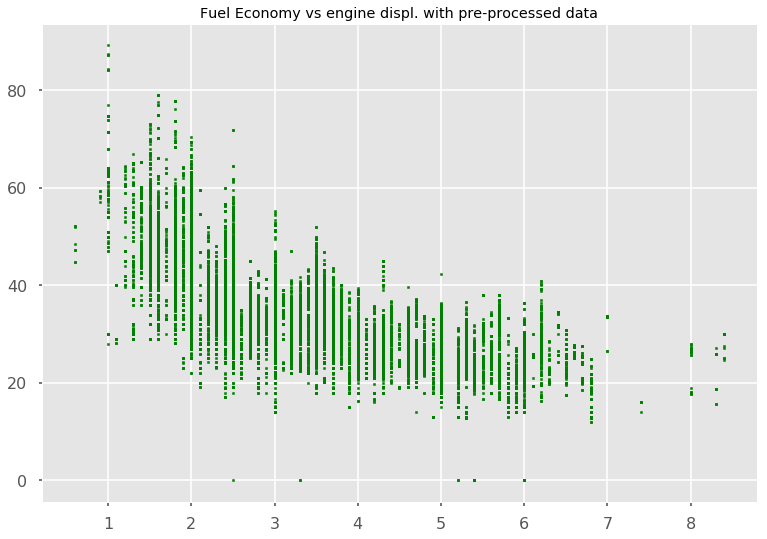

In [134]:
ax.set_xlabel ("Engine displacement (Liter)")
ax.set_ylabel ("Fuel Economy (MPG)")
plt.scatter (vehicles_displ_mpg_processed .displ, vehicles_displ_mpg_processed .UHighway, s = 2.5, c = "g", marker="s")

plt.title('Fuel Economy vs engine displ. with pre-processed data', loc = 'center')

plt.show()

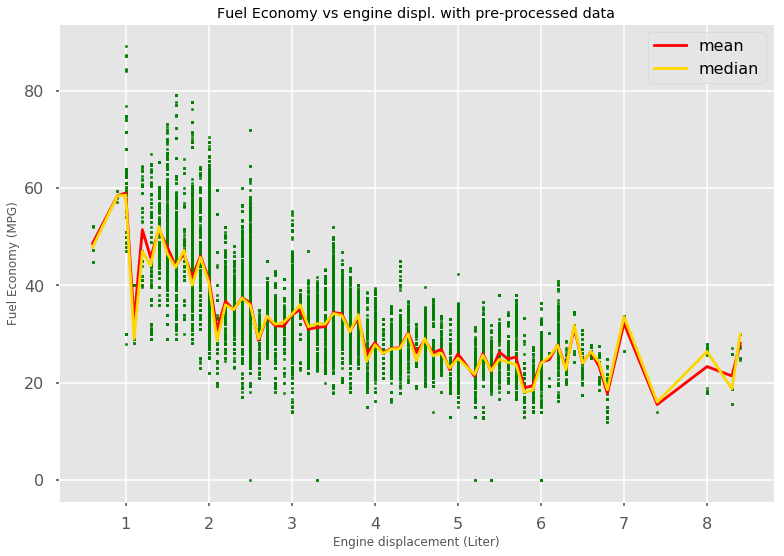

In [139]:
ax = df_mean.plot (x = "displ", y = "mean", c = "r")
df_median = pd.DataFrame({'median' : vehicles_displ_mpg_sorted.groupby('displ')['UHighway'].median()}).reset_index() 
df_median.plot (ax=ax, x = "displ", y = "median", c = "gold")

ax.set_xlabel ("Engine displacement (Liter)")
ax.set_ylabel ("Fuel Economy (MPG)")
plt.scatter (vehicles_displ_mpg_processed .displ, vehicles_displ_mpg_processed .UHighway, s = 2.5, c = "g", marker="s")

plt.title('Fuel Economy vs engine displ. with pre-processed data', loc = 'center')
plt.show()

## Linear Model

In [193]:
vehicles_displ_mpg_all = vehicles_df[['displ', 'UHighway']]
vehicles_displ_mpg = vehicles_displ_mpg_all[vehicles_displ_mpg_all.displ > 0]

In [195]:
half = int(len(vehicles_displ_mpg) / 2)

In [196]:
first_half = vehicles_displ_mpg[:half]
second_half = vehicles_displ_mpg[half:]

In [197]:
first_half_sorted = first_half.sort_values(by=['displ', 'UHighway'])
first_half_grouped_by_mean = pd.DataFrame({'train_mean' : \
                                          first_half_sorted.groupby('displ')['UHighway'].mean()}).reset_index()

In [199]:
first_half_x = first_half_grouped_by_mean['displ'].values.reshape(-1, 1)

In [202]:
print(type(first_half_x))
print(first_half_x.shape)

<class 'numpy.ndarray'>
(60, 1)


In [204]:
first_half_y = first_half_grouped_by_mean ['train_mean'].values.reshape(-1,1)
print(first_half_y.shape)

(60, 1)


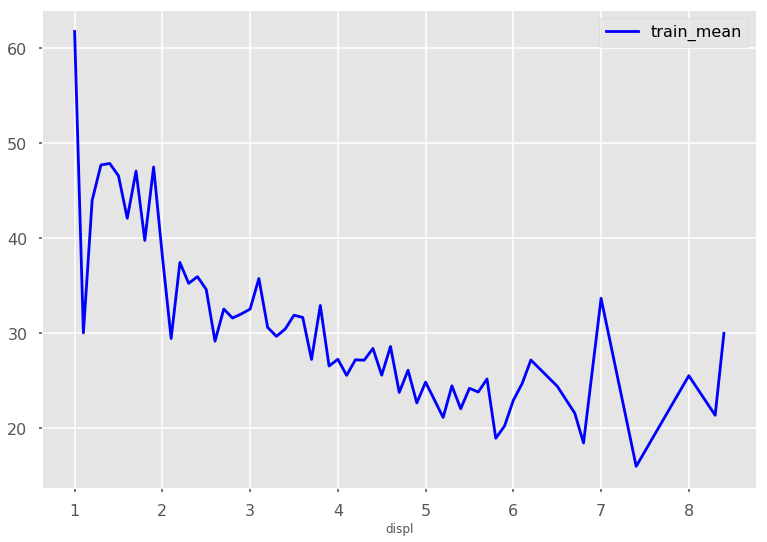

In [208]:
ax = first_half_grouped_by_mean.plot (x = "displ", y = "train_mean", c = "b")
plt.show ()

In [209]:
second_half_sorted = second_half.sort_values(by=['displ', 'UHighway'])
second_half_grouped_by_mean = pd.DataFrame({'test_mean' : \
                                           second_half_sorted.groupby('displ')['UHighway'].mean()}).reset_index()

In [210]:
second_half_x = second_half_grouped_by_mean['displ'].values.reshape(-1, 1)
second_half_y = second_half_grouped_by_mean['test_mean'].values.reshape(-1, 1)

In [213]:
regr = linear_model.LinearRegression()

In [214]:
regr.fit(first_half_x, first_half_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [215]:
second_half_y_pred = regr.predict(second_half_x)

In [217]:
print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

Intercept:  [44.58739248]
Coefficients:  [[-3.43936081]]
